<a href="https://colab.research.google.com/github/AhmedElshobaky/mnist_image_recognition/blob/master/mnist_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# setting random seed
np.random.seed(0)
tf.random.set_seed(1)

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("length of training set: ", len(x_train))
print("length of test set: ", len(x_test))

length of training set:  60000
length of test set:  10000


Label is:  5


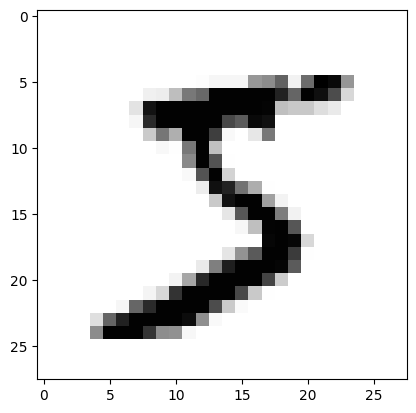

In [9]:
plt.imshow(x_train[0], cmap='Greys')
print("Label is: ", y_train[0])

x_train[0].shape:  (28, 28)


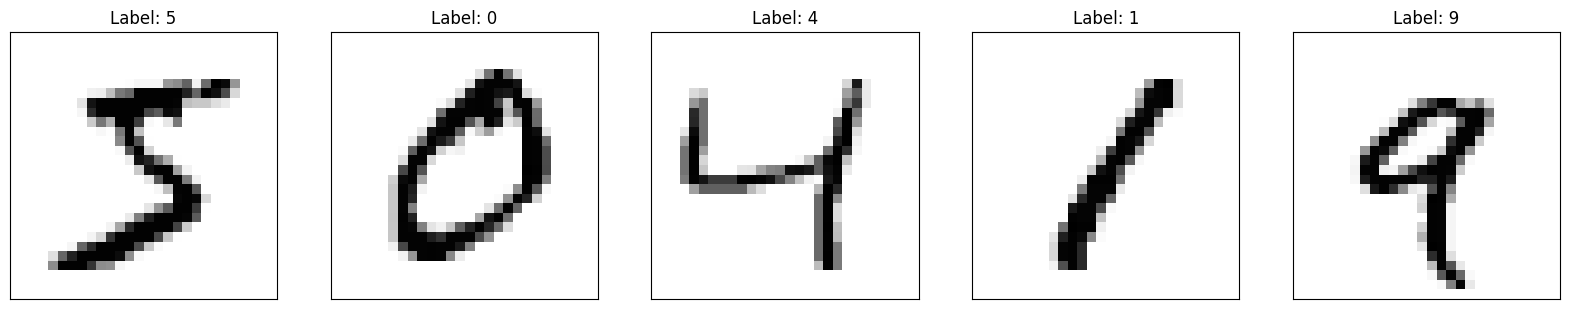

In [10]:
fig = plt.figure(figsize=(20, 20))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='Greys')
    ax.set_title('Label: ' + str(y_train[i]))
print("x_train[0].shape: ",x_train[0].shape)

In [11]:
# reshape
x_train_reshaped = x_train.reshape(-1, 28*28)
x_test_reshaped = x_test.reshape(-1, 28*28)
print("x_train_reshaped[0].shape: ",x_train_reshaped[0].shape)

x_train_reshaped[0].shape:  (784,)


In [12]:
# make y categorical
from tensorflow.keras.utils import to_categorical
print('y_train[0]: ', y_train[0])
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print('y_train_cat[0]: ', y_train_cat[0])

y_train[0]:  5
y_train_cat[0]:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **Building the model**

In [13]:
#model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,))) #1st layer: 128 nodes
model.add(Dropout(0.2))  #Add dropout so the model doesn't overfit
model.add(Dense(64, activation='relu')) # 2nd hidden layer: 64 nodes
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax')) #output layer: 10 nodes

#compile
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# train
model.fit(x_train_reshaped, y_train_cat, epochs = 10, batch_size=10 )

Epoch 1/10
6000/6000 [==============================] - 23s 3ms/step - loss: 1.9588 - accuracy: 0.6531
Epoch 2/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.5958 - accuracy: 0.8302
Epoch 3/10
6000/6000 [==============================] - 18s 3ms/step - loss: 0.4681 - accuracy: 0.8740
Epoch 4/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.4129 - accuracy: 0.8899
Epoch 5/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.3744 - accuracy: 0.9016
Epoch 6/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.3684 - accuracy: 0.9034
Epoch 7/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.3525 - accuracy: 0.9103
Epoch 8/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.3397 - accuracy: 0.9127
Epoch 9/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.3356 - accuracy: 0.9176
Epoch 10/10
6000/6000 [==============================] - 18s 3ms/step - l

In [15]:
# predictions
predictions_vector = model.predict(x_test_reshaped)

313/313 [==============================] - 1s 4ms/step


In [16]:
predictions = [np.argmax(pred) for pred in predictions_vector]

In [19]:
num_correct = 0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        num_correct += 1
print("Model accuracy: ", (num_correct/len(y_test))*100, '%')

Model accuracy:  95.15 %
